# Import Libraries

In [37]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import metrics

data = pd.read_excel(r'C:\Users\user\Desktop\SixHKStockData.xls',
sheet_name='Stacked',
header=0,
index_col=False,
keep_default_na=True
)


# Data Preprocessing

In [38]:
#drop tdate
data=data.drop(['tdate'], axis=1)
display(data.head())
data.shape

#drop null and 0
data=data.dropna(how = 'any')
data=data[data['volume'] != 0]


,stock_id,open,close,high,low,volume
0,1,100.0,98.00,101.0,98.00,2283100
1,1,93.5,91.25,95.0,90.75,4330100
2,1,92.0,86.75,92.5,85.00,7462000
3,1,88.0,88.50,89.0,86.50,4323800
4,1,91.5,89.25,93.0,89.25,3713200


# Remove Outlier

In [39]:
#Find out the 5th pencentile and 95th percentile
low = .05
high = .95
percentile = data.quantile([low,high])
print(percentile)


      stock_id    open   close    high     low       volume
0.05       1.0    1.63    1.63    1.65    1.61    1252575.0
0.95     857.0  104.00  104.00  104.80  103.00  122118200.0


In [40]:
#filter out the value smaller than 0.05th percentile and larger than 0.95th percentile
data=data[data.open < np.percentile(data.open,95)]
data=data[data.open > np.percentile(data.open,5)]

data=data[data.close < np.percentile(data.close,95)]
data=data[data.close > np.percentile(data.close,5)]

data=data[data.high < np.percentile(data.high,95)]
data=data[data.high > np.percentile(data.high,5)]

data=data[data.low < np.percentile(data.low,95)]
data=data[data.low > np.percentile(data.low,5)]

data=data[data.volume < np.percentile(data.volume,95)]
data=data[data.volume > np.percentile(data.volume,5)]

data.shape


(6192, 6)

# Visualization and Scale the Data

In [41]:
# print out the summary
summary_df = data.describe()

#add the standard deviation metric
summary_df.loc['+3_std'] = summary_df.loc['mean'] + (summary_df.loc['std'] * 3)
summary_df.loc['-3_std'] = summary_df.loc['mean'] - (summary_df.loc['std'] * 3)

summary_df

,stock_id,open,close,high,low,volume
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6.192000e+03
mean,83.026809,42.865493,42.842143,43.270619,42.402054,5.232390e+06
std,121.679933,27.349382,27.326642,27.576899,27.080938,2.922742e+06
min,1.000000,9.550000,9.550000,9.700000,9.450000,1.346800e+06
25%,11.000000,15.100000,15.100000,15.300000,14.900000,2.952975e+06
50%,23.000000,41.675000,41.675000,42.125000,41.100000,4.550600e+06
75%,293.000000,70.200000,70.250000,70.750000,69.750000,6.856025e+06
max,293.000000,92.000000,90.000000,92.500000,85.700000,1.450790e+07
+3_std,448.066607,124.913638,124.822068,126.001317,123.644867,1.400062e+07
-3_std,-282.012990,-39.182652,-39.137782,-39.460080,-38.840759,-3.535836e+06


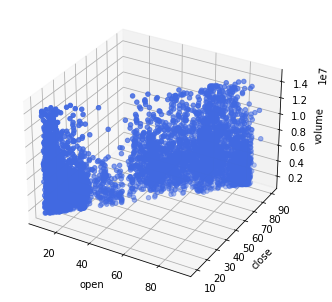

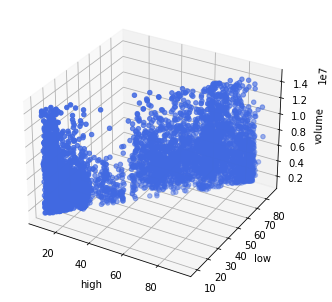

In [42]:
#define figure
fig = plt.figure()
ax = Axes3D(fig)

#define the x, y, z axis
x = list(data.iloc[:,1])
y = list(data.iloc[:,2])
z = list(data.iloc[:,5])

#define the axis labels
column_names = data.columns
ax.set_xlabel(column_names[1])
ax.set_ylabel(column_names[2])
ax.set_zlabel(column_names[5])

#define the markers and the color
ax.scatter(x,y,z, c='royalBlue', marker = 'o')

plt.show()

fig = plt.figure()
ax = Axes3D(fig)

#define the x, y, z axis
x = list(data.iloc[:,3])
y = list(data.iloc[:,4])
z = list(data.iloc[:,5])

#define the axis labels
column_names = data.columns
ax.set_xlabel(column_names[3])
ax.set_ylabel(column_names[4])
ax.set_zlabel(column_names[5])

#define the markers and the color
ax.scatter(x,y,z, c='royalBlue', marker = 'o')

plt.show()

# Clustering by K-means

Text(0, 0.5, 'Inertia')

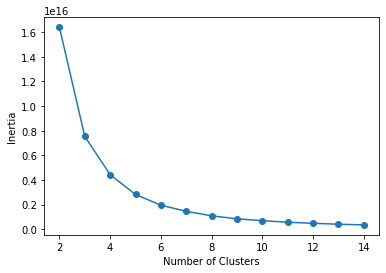

In [43]:
#choosing the value k by elbow method
inertia = []
for k in range(2,15):
    model = KMeans(n_clusters=k, random_state=12).fit(data)
    inertia.append(model.inertia_)

#Plotting the inertia of the models    
k_values = range(2,15)
plt.plot(k_values, inertia, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

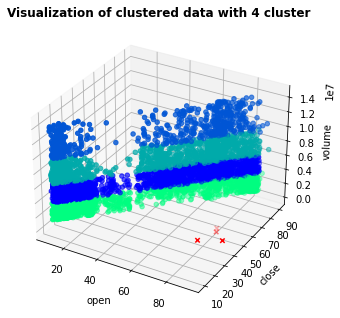

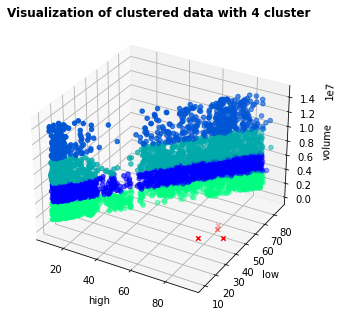

In [44]:
kmeans = KMeans(n_clusters=4, random_state=12).fit(data)

#define the clusters
cluster_centers = kmeans.cluster_centers_
c1 = cluster_centers[:,0]
c2 = cluster_centers[:,1]
c3 = cluster_centers[:,2]

#define figure
fig = plt.figure()
ax = Axes3D(fig)

#define the x, y, z axis
x = list(data.iloc[:,1])
y = list(data.iloc[:,2])
z = list(data.iloc[:,5])

#define the axis labels
column_names = data.columns
ax.set_xlabel(column_names[1])
ax.set_ylabel(column_names[2])
ax.set_zlabel(column_names[5])

#define the markers and the color
ax.scatter(x,y,z, c=kmeans.labels_.astype(float),cmap = 'winter', marker = 'o')
ax.scatter(c1,c2,c3, marker = 'x', color = 'r')

#define title
plt.title("Visualization of clustered data with 4 cluster", fontweight = 'bold')

plt.show()

fig = plt.figure()
ax = Axes3D(fig)

#define the x, y, z axis
x = list(data.iloc[:,3])
y = list(data.iloc[:,4])
z = list(data.iloc[:,5])

#define the axis labels
column_names = data.columns
ax.set_xlabel(column_names[3])
ax.set_ylabel(column_names[4])
ax.set_zlabel(column_names[5])

#define the markers and the color
ax.scatter(x,y,z, c=kmeans.labels_.astype(float),cmap = 'winter', marker = 'o')
ax.scatter(c1,c2,c3, marker = 'x', color = 'r')

#define title
plt.title("Visualization of clustered data with 4 cluster", fontweight = 'bold')

plt.show()